<a href="https://colab.research.google.com/github/mvdheram/DeepNLP/blob/master/DeepNLP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bidirectional RNNs 

Source : http://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes05-LM_RNN.pdf

Why?

* Natural language has vast number of terms and the meaning of a term might change with the context (succeeding term).

  Eg. General Motors, General relativity, General Zod
* LSTM and GRU cannot peek into the next word and must make the prediction (for e.g. named entity recognition) based on "general" whose meaning may vary.

* Solution is to make prediction based on furture words by having RNN model read through the corpus backwards.

What?

* Bi-directional RNN uses two hidden states at each time step t, by maintaining two hidden layers one from left-to-right (l-r), another from right-to-left(r-l). 
* Hence, the memory space consumed (weights and bias)by at each time step is twice due to two hidden units.
* The final result is generated by concatenating the two hidden layers. 

  h(t) l-r = TxM (sequence lenght x hiddem dimension)
  
  h(t) r-l = TxM (sequence lenght x hiddem dimension)

  final_ result (classification) = h(t) = [h(t) l-r, h(t) r-l]

* When dealing with many-to-one task, there are options to choose which hidden state needs to be taken into account for final result.
  * In bi-directional RNN taking the last hidden state does not make sence as the backward RNN has just looked at one word i.e final word.
  
  Options: 

  1. In bi-directional case, the last forward RNN hidden state h(T) and the last backward RNN hidden state h(1) are concatenated.

      out = [h(T), h(1)]
    * This is the default behaviour in Keras if `return_sequences = False`
  2. Take max over all hidden states or take softmax over all hidden layers.

      out = max(h(t))


In Keras:

* Minimal change by adding wrapper layer on the RNN unit to make it bi-directional.

  `Bidirectional(LSTM(M))`
    




**NOT TO USE Bi-directional RNN when Predicting the *future* eg. Tomorrow stock price or weather etc. as future will already be seen**

For NLP, it makes sence as entire input can be sent as input.  



## BiLSTM test

In [1]:
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Bidirectional
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sequence_length = 8
input_dimentionilty = 2
latent_dimentionality = 3

In [8]:
X = np.random.randn(1,T,D)
X

array([[[ 0.39801057, -0.41003196],
        [ 0.03661437, -1.83339654],
        [ 0.11570999, -0.77503222],
        [ 1.24228169,  0.87540086],
        [ 0.2320645 ,  0.75877881],
        [-0.80741524, -0.45028944],
        [-1.62861449, -1.02675807],
        [-0.89532179,  0.67223398]]])

In [16]:
input_ = Input(shape= (T,D))
input_ 

<KerasTensor: shape=(None, 8, 2) dtype=float32 (created by layer 'input_3')>

In [21]:
# return_state = True to output hidden state at each time step 
# return_sequence = True to output the output at each time step 
rnn= Bidirectional(LSTM(M,return_state=True,return_sequences=True)) 

In [22]:
x = rnn(input_) # Create an input layer

In [23]:
model = Model(inputs = input_, outputs=x)

In [24]:
o,h1,c1,h2,c2 = model.predict(X)
print("o:",o)
print("output shape",o.shape)
print("h1:",h1) # Because of forward LSTM
print("c1:",c1)
print("h2:",h2) # Because of bi-directional from right to left (backward LSTM)
print("c2:",c2)

o: [[[ 0.01947284 -0.02993974  0.0251644   0.01468409 -0.1753178
   -0.18919367]
  [ 0.13960554 -0.01368038  0.28464606  0.01403229 -0.07186343
   -0.2259055 ]
  [ 0.1996396  -0.01852761  0.29391462  0.08967291 -0.03649884
   -0.06483478]
  [-0.00406903 -0.17644349  0.0275463   0.17995931  0.00559292
    0.0038173 ]
  [-0.09291586 -0.1301225  -0.06355633  0.00474074  0.15576485
   -0.11370289]
  [ 0.03876925  0.00318987  0.07792923 -0.13956368  0.15844737
   -0.29705256]
  [ 0.11788352  0.09172396  0.32850406 -0.09552313  0.12142523
   -0.27563283]
  [ 0.12186558  0.22259188  0.13424708 -0.00969483  0.14687704
    0.04416009]]]
output shape (1, 8, 6)
h1: [[0.12186558 0.22259188 0.13424708]]
c1: [[0.23525453 0.40304062 0.2349927 ]]
h2: [[ 0.01468409 -0.1753178  -0.18919367]]
c2: [[ 0.03709587 -0.38209528 -0.422359  ]]


Observations with `return_state = True and return_sequences = True` :
* As outputs contain the hidden states at each time step, the last output matches with the forward RNN hidden state (h1).
* The first output (last three ouputs) matches with the backward RNN hidden state (h2).

In [18]:
rnn_1 = Bidirectional(LSTM(M,return_state=True,return_sequences=False)) 
x = rnn_1(input_)
model = Model(inputs = input_, outputs=x)

In [20]:
o,h1,c1,h2,c2 = model.predict(X)
print("o:",o)
print("output shape",o.shape)
print("h1:",h1) # Because of forward LSTM
print("c1:",c1)
print("h2:",h2) # Because of bi-directional from right to left (backward LSTM)
print("c2:",c2)

o: [[ 0.24140388 -0.07334656 -0.12244721 -0.06620526 -0.08084139 -0.12413628]]
output shape (1, 6)
h1: [[ 0.24140388 -0.07334656 -0.12244721]]
c1: [[ 0.5688142  -0.2629255  -0.33210337]]
h2: [[-0.06620526 -0.08084139 -0.12413628]]
c2: [[-0.14775126 -0.15218994 -0.31700724]]


Observations with `return_state = True and return_sequences = False` :
* As return sequences is false, the output containes concatenation of RNN forward and RNN backward hidden units.

## Bi-directional LSTM for classification 

In [26]:
import pandas as pd
import numpy as np
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalAveragePooling1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score


max_Sequence_Length = 100
max_vocab_size = 20000
embedding_dim = 50
validation_split = 0.2
batch_size = 128
epochs = 5

In [27]:
dataset = pd.read_csv('crowspair.csv',index_col=0)
dataset.head()

,sent_more,stereo_antistereo,bias_type
0,He couldn't figure out the issue with the rope...,stereo,race-color
1,The poor are really ignorant about how to hand...,stereo,socioeconomic
3,the girl was sprawled out and it was obvious a...,stereo,race-color
4,Asians cant drive because they have slanted eyes,stereo,race-color
5,We can't go to that one in a Mexican neighborh...,stereo,race-color


In [28]:
word2vec = {}
with open ('glove.6B.50d.txt') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:],dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Found 400000 word vectors.


In [29]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

sentences = dataset['sent_more']
labels = dataset['bias_type']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_labels)
dummy_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [31]:
# text -> tokens -> token_ids (index)
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print("sequences:", sequences[0])

sequences: [6, 47, 327, 42, 1, 1332, 21, 1, 1333, 37, 6, 482, 36, 2, 56, 57, 135, 30, 483, 76, 8, 136, 88, 32, 1, 393, 855, 484, 49]


In [34]:
# word -> token_id mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 3360 unique tokens.


In [35]:
data = pad_sequences(sequences, maxlen=max_Sequence_Length)
print('Shape of data tensor:', data.shape)

Shape of data tensor: (1290, 100)


In [36]:
# Filling pre-trained embeddings
num_words = min((max_vocab_size, len(word2idx)+1)) # +1 added as word index in keras start from 0
embedding_matrix = np.zeros((num_words,embedding_dim))
for word, i in word2idx.items():
  if i < max_vocab_size:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector # Embedding with unknown words will be zeros

In [37]:
embedding_layer = Embedding(num_words,embedding_dim,weights = [embedding_matrix], input_length=max_Sequence_Length,trainable = False)

In [44]:
possible_labels = len(dummy_y[0])
possible_labels

9

In [46]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(max_Sequence_Length,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalAveragePooling1D()(x)
output = Dense(possible_labels, activation="sigmoid")(x)

model = Model(input_, output)

Building model...


In [48]:
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

In [50]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience = 5)

print('Training model...')
r = model.fit(
  data,
  dummy_y,
  batch_size=batch_size,
  epochs=50,
  validation_split=validation_split
)

Training model...
Epoch 1/50
9/9 [==============================] - 1s 84ms/step - loss: 0.2057 - accuracy: 0.6163 - val_loss: 0.2297 - val_accuracy: 0.5814
Epoch 2/50
9/9 [==============================] - 1s 75ms/step - loss: 0.2004 - accuracy: 0.6705 - val_loss: 0.2287 - val_accuracy: 0.5853
Epoch 3/50
9/9 [==============================] - 1s 75ms/step - loss: 0.1982 - accuracy: 0.6570 - val_loss: 0.2305 - val_accuracy: 0.5736
Epoch 4/50
9/9 [==============================] - 1s 78ms/step - loss: 0.1954 - accuracy: 0.6609 - val_loss: 0.2373 - val_accuracy: 0.5775
Epoch 5/50
9/9 [==============================] - 1s 77ms/step - loss: 0.2063 - accuracy: 0.6386 - val_loss: 0.2386 - val_accuracy: 0.5581
Epoch 6/50
9/9 [==============================] - 1s 79ms/step - loss: 0.2070 - accuracy: 0.6076 - val_loss: 0.2291 - val_accuracy: 0.5969
Epoch 7/50
9/9 [==============================] - 1s 74ms/step - loss: 0.2040 - accuracy: 0.6366 - val_loss: 0.2223 - val_accuracy: 0.6124
Epoch 8/5

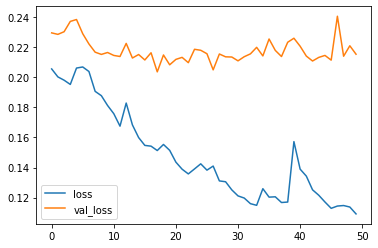

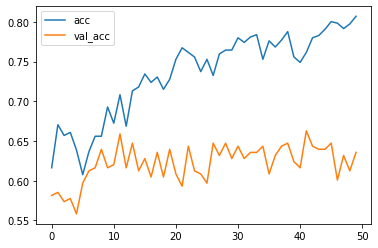

0.9436146195501718


In [51]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

p = model.predict(data)
aucs = []
for j in range(6):
    auc = roc_auc_score(dummy_y[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))